In [1]:
import numpy as np
import os
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# 이동창 함수
시계열 연산에서 사용되는 배열 변형에서 중요한 요소는 움직이는 창 또는 지수 가중과 함께 수해오디는 통계와 여타 함수들이다. 

누락된 데이터로 인해 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬을수 있다. 

이동창 함수: 지수 가중 가중 이동 편균 처럼 고정 크기의 창을 가지지 않은 함수도 포함. 누락된 데이터를 자동 베지 
    

In [2]:
close_px_all = pd.read_csv('C:\workspace1\pydata-book\examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<Figure size 720x432 with 0 Axes>

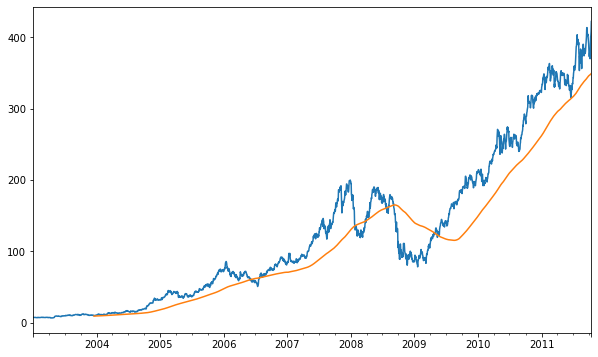

<Figure size 720x432 with 0 Axes>

In [3]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
plt.figure()

<Figure size 720x432 with 0 Axes>

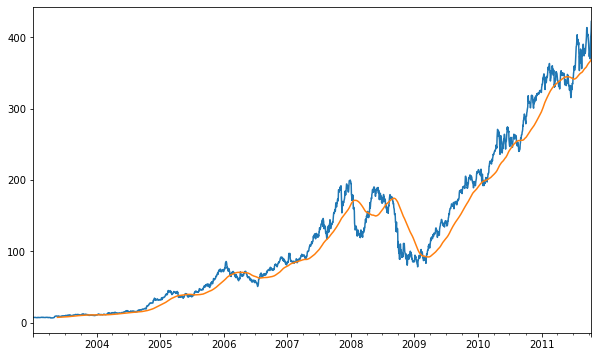

<Figure size 720x432 with 0 Axes>

In [4]:
close_px.AAPL.plot()
close_px.AAPL.rolling(100).mean().plot()
plt.figure()

<Figure size 720x432 with 0 Axes>

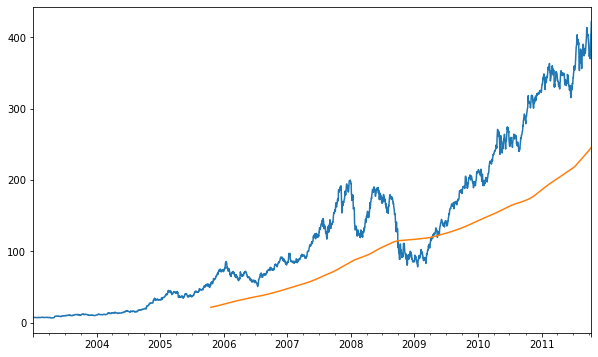

<Figure size 720x432 with 0 Axes>

In [5]:
close_px.AAPL.plot()
close_px.AAPL.rolling(730).mean().plot()
plt.figure()

In [6]:
# min_periods: Minimum number of observations in window required to have a value. default = 1
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [7]:
close_px.AAPL.rolling(250,min_periods=1).std()[5:12]

2003-01-09    0.068532
2003-01-10    0.063696
2003-01-13    0.063569
2003-01-14    0.065000
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

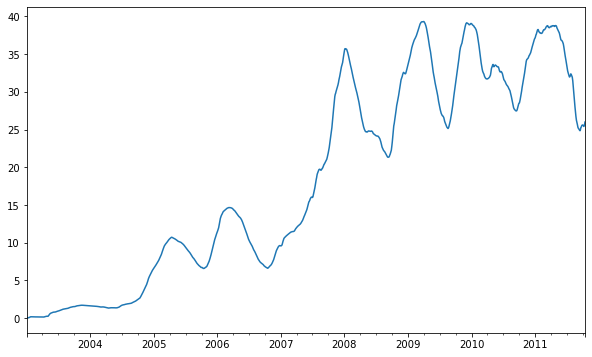

In [8]:
close_px.AAPL.rolling(250,min_periods=1).std().plot()

<AxesSubplot:>

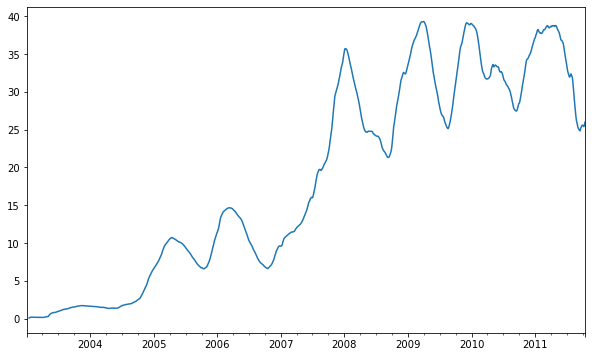

In [9]:
appl_std250.plot()

확장창 편균 을 구하기 위해서는 rolling 대신 explanding 을 사용한다. 시계열의 시작 지점부터 창의 크기가 시계열의 전체 크기가 될때 까지 점점 창의 크기를 늘린다. 

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

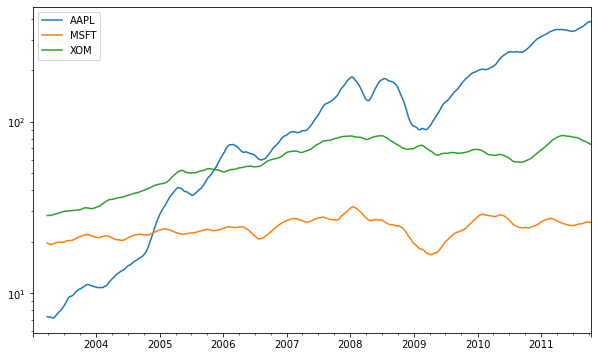

In [10]:
#확장창 평균

expanding_mean = appl_std250.expanding().mean()
plt.figure()
close_px.rolling(60).mean().plot(logy=True)

In [11]:

close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


<AxesSubplot:>

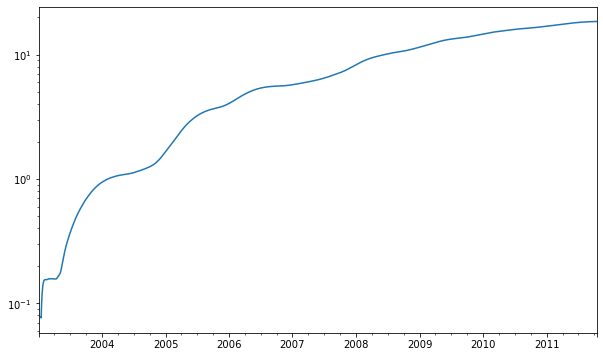

In [12]:
expanding_mean.plot(logy=True)

## 지수 가중 함수 

감쇠인자 (decay factor) 상수에 좀 더 많은 가중치를 줘서 더 최근 값을 관찰

가장 많이 쓰이는 방법은 기간을 사용

이방법은 결과를 같은 기간의 창을 가지는 단순 이동창 함수와 비교 가능하도록 해줍니다.



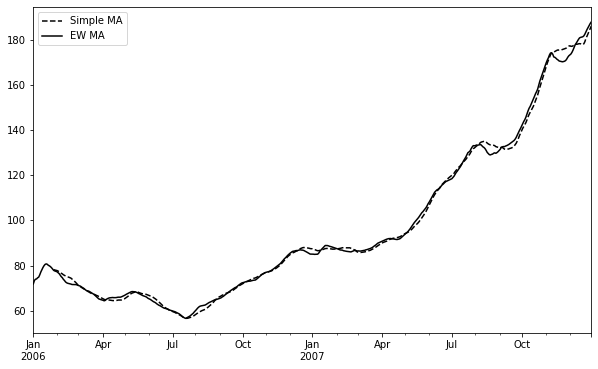

In [13]:
plt.figure()
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

## 이진 이동창 함수 

상관관계와 공분산 같은 통계연산에 사용된다 


<AxesSubplot:>

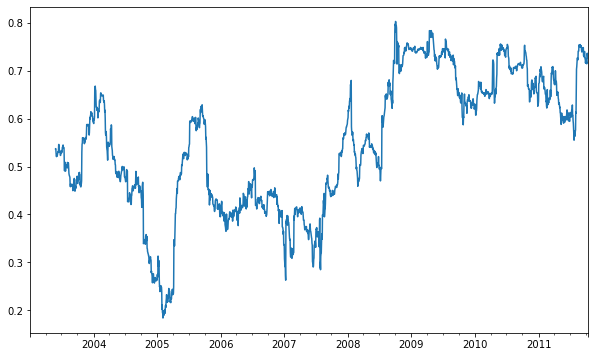

In [15]:
plt.figure()

spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [17]:
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

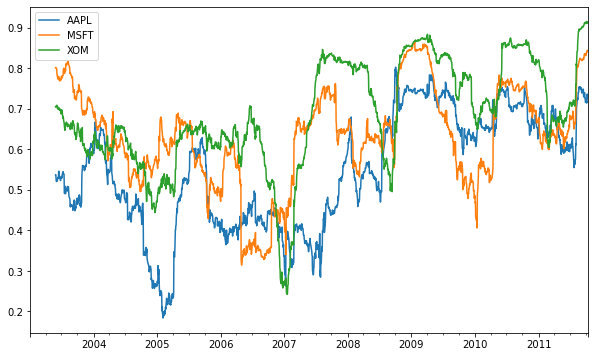

In [16]:
plt.figure()
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

## 사용자 정의 이동창 함수

rollingd이나 다른 메서드에 apply를 호출 해서 이동창에 대한 사용자 저으이 연산을 수행.

단일값 반환 을 하는 함수를 만들어야 한다. 

<AxesSubplot:>

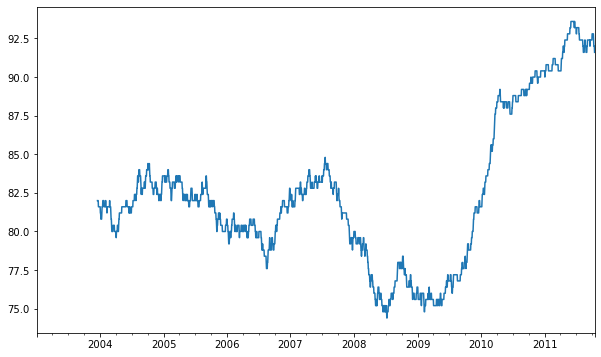

In [18]:

plt.figure()
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()